<a href="https://colab.research.google.com/github/FranklinAkogwu/portfolio/blob/main/SalesBasedonDemographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data handling and numerical operations
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set seaborn style for better plots
sns.set(style="whitegrid")


In [4]:
from google.colab import files

# Upload the dataset CSV file from your local machine
uploaded = files.upload()

# Get filename (assuming only one file uploaded)
filename = list(uploaded.keys())[0]

# Load dataset into pandas DataFrame
df = pd.read_csv(filename)

# Preview first 5 rows
print("First 5 rows of dataset:")
df.head()


Saving Demographic_Data_Orig.csv to Demographic_Data_Orig (1).csv
First 5 rows of dataset:


,index,full.name,ip.address,region,in.store,age,items,amount
0,0,Carter Stokes,NaN,2,0,37,4,281.03
1,1,Jacob Jerde,NaN,2,0,35,2,219.51
2,2,Tressa Ratke,192.90.208.202,4,1,45,3,1525.70
3,3,Rudolf Abshire,251.55.128.164,3,1,46,3,715.25
4,4,Theresa Davis,182.19.192.186,1,1,33,4,1937.50


In [5]:
# Check data info (types, non-null counts)
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       80000 non-null  int64  
 1   full.name   80000 non-null  object 
 2   ip.address  40000 non-null  object 
 3   region      80000 non-null  int64  
 4   in.store    80000 non-null  int64  
 5   age         80000 non-null  int64  
 6   items       80000 non-null  int64  
 7   amount      80000 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ MB

Missing values per column:
index             0
full.name         0
ip.address    40000
region            0
in.store          0
age               0
items             0
amount            0
dtype: int64

Descriptive statistics:
              index        region      in.store           age         items  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean   39999.500000  

In [6]:
# Drop the ip.address column
df = df.drop(columns=['ip.address'])
print("Dropped 'ip.address' column due to excessive missing values and limited relevance.")


Dropped 'ip.address' column due to excessive missing values and limited relevance.


In [7]:
# Verify the 'ip.address' column is dropped
print("Columns after dropping 'ip.address':")
print(df.columns)

# Check for any remaining missing values in all columns
print("\nMissing values per column after dropping 'ip.address':")
print(df.isnull().sum())


Columns after dropping 'ip.address':
Index(['index', 'full.name', 'region', 'in.store', 'age', 'items', 'amount'], dtype='object')

Missing values per column after dropping 'ip.address':
index        0
full.name    0
region       0
in.store     0
age          0
items        0
amount       0
dtype: int64


In [8]:
# Convert 'Gender' column to categorical type for memory efficiency and better handling
df['Gender'] = df['Gender'].astype('category')

# Confirm data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


KeyError: 'Gender'

In [11]:
print(df.columns.tolist())


['index', 'full.name', 'region', 'in.store', 'age', 'items', 'amount']


In [12]:
# Convert 'region' and 'in.store' to categorical if not already
df['region'] = df['region'].astype('category')
df['in.store'] = df['in.store'].astype('category')

# Confirm data types
print(df.dtypes)


index           int64
full.name      object
region       category
in.store     category
age             int64
items           int64
amount        float64
dtype: object


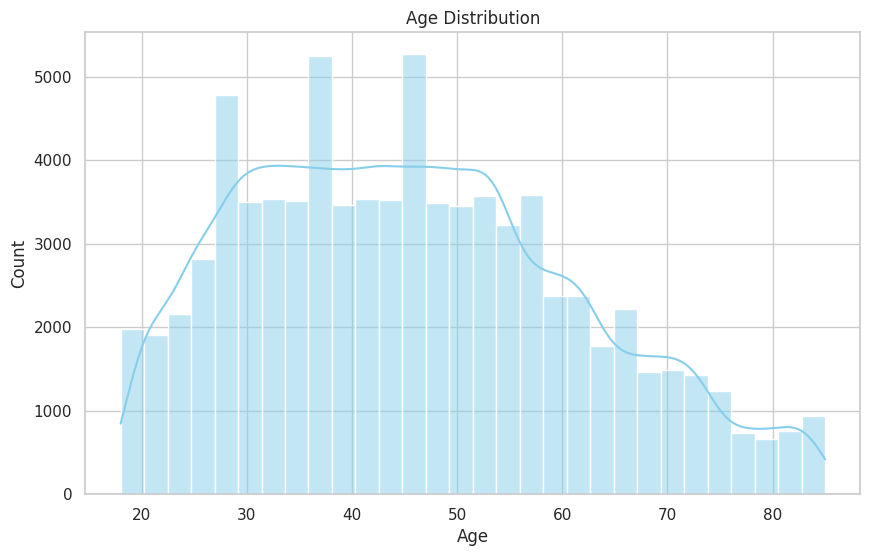

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


<ipython-input-14-e8ea1b663b2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='pastel')


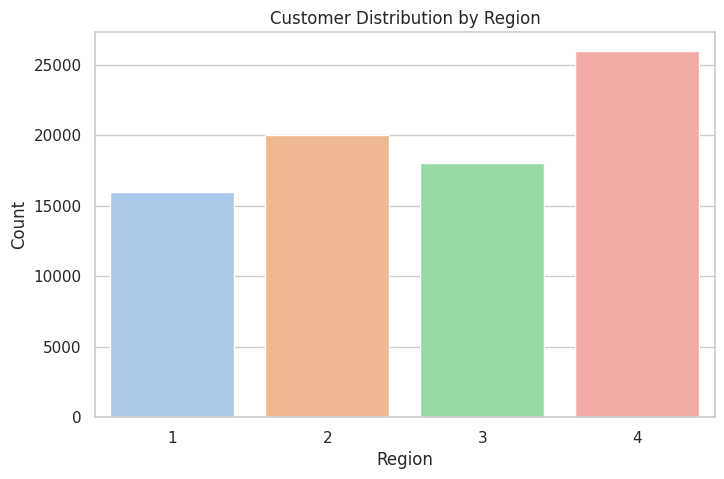

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


<ipython-input-18-a2ab2e72e3a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in.store', data=df, palette='Set2')


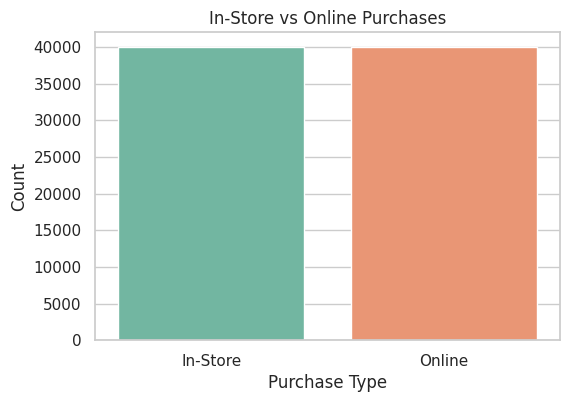

In [18]:
# Map 0 to 'In-Store' and 1 to 'Online' for clarity
df['in.store'] = df['in.store'].map({0: 'In-Store', 1: 'Online'})

plt.figure(figsize=(6,4))
sns.countplot(x='in.store', data=df, palette='Set2')
plt.title('In-Store vs Online Purchases')
plt.xlabel('Purchase Type')
plt.ylabel('Count')
plt.show()



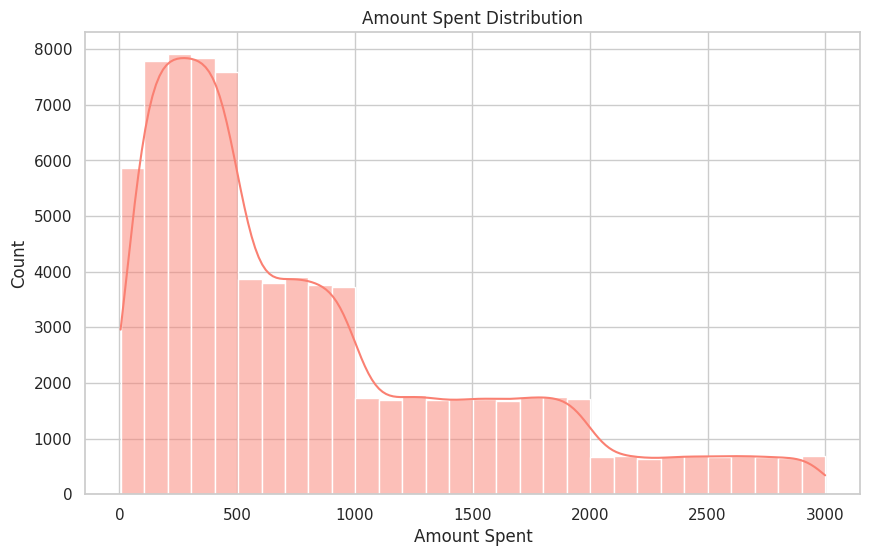

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=30, kde=True, color='salmon')
plt.title('Amount Spent Distribution')
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()


<ipython-input-17-93d4c21ec756>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='amount', data=df, palette='Set3')


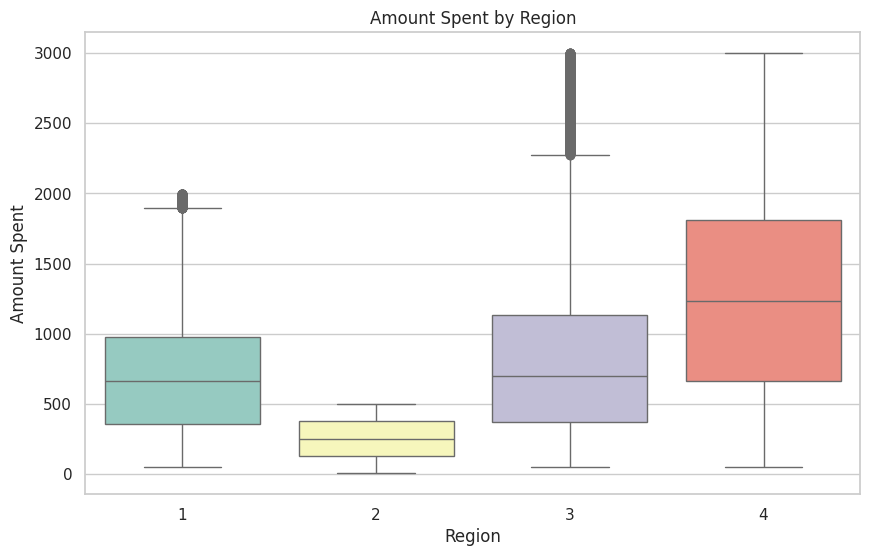

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='amount', data=df, palette='Set3')
plt.title('Amount Spent by Region')
plt.xlabel('Region')
plt.ylabel('Amount Spent')
plt.show()


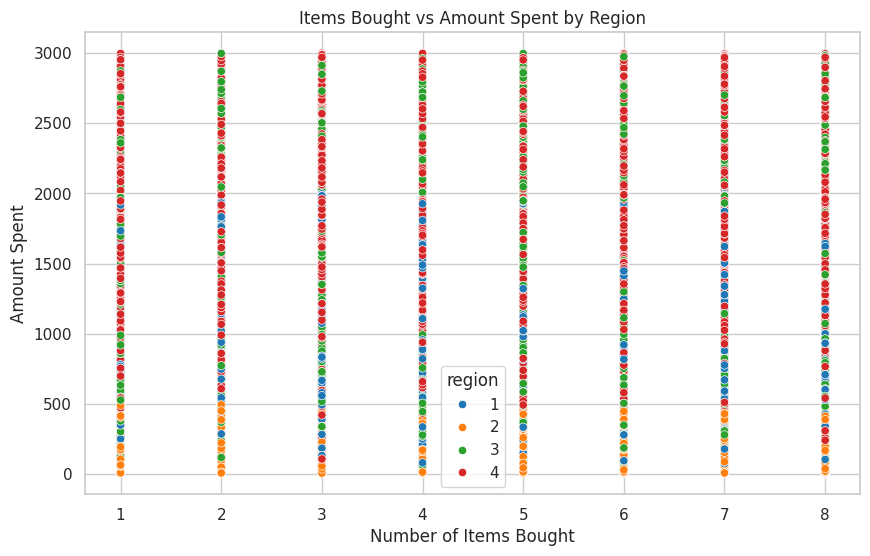

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='items', y='amount', hue='region', data=df, palette='tab10')
plt.title('Items Bought vs Amount Spent by Region')
plt.xlabel('Number of Items Bought')
plt.ylabel('Amount Spent')
plt.show()

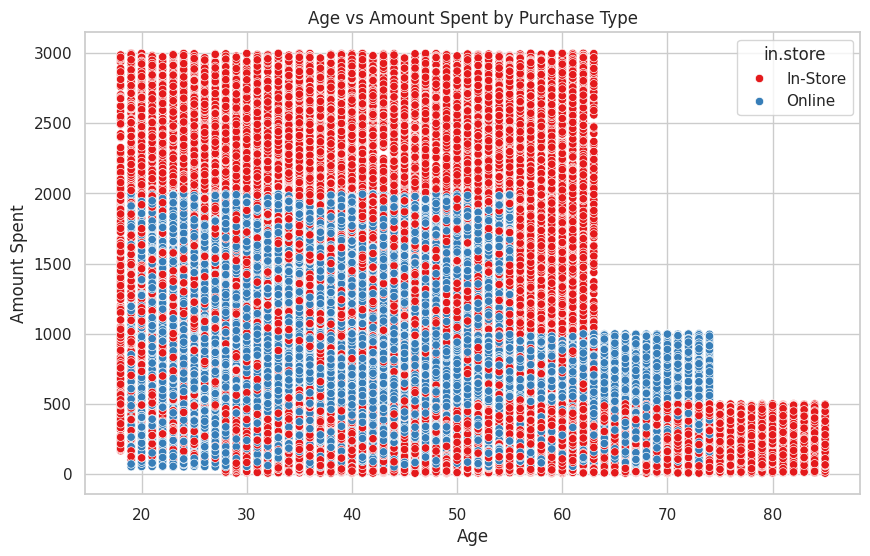

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='amount', hue='in.store', data=df, palette='Set1')
plt.title('Age vs Amount Spent by Purchase Type')
plt.xlabel('Age')
plt.ylabel('Amount Spent')
plt.show()

In [21]:
print("\nAverage amount spent by region:")
print(df.groupby('region')['amount'].mean().round(2))

print("\nAverage amount spent by purchase type (in.store):")
print(df.groupby('in.store')['amount'].mean().round(2))

print("\nAverage number of items bought by region:")
print(df.groupby('region')['items'].mean().round(2))

print("\nAverage age by purchase type:")
print(df.groupby('in.store')['age'].mean().round(1))


Average amount spent by region:
region
1     745.16
2     252.11
3     917.97
4    1284.05
Name: amount, dtype: float64

Average amount spent by purchase type (in.store):
in.store
In-Store    897.57
Online      774.27
Name: amount, dtype: float64

Average number of items bought by region:
region
1    4.51
2    4.51
3    4.49
4    4.50
Name: items, dtype: float64

Average age by purchase type:
in.store
In-Store    48.6
Online      43.0
Name: age, dtype: float64


<ipython-input-21-fc91832001eb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('region')['amount'].mean().round(2))
<ipython-input-21-fc91832001eb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('in.store')['amount'].mean().round(2))
<ipython-input-21-fc91832001eb>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('region')['items'].mean().round(2))
<ipython-input-21-